In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-globalapprox-orthogonal)=
# Orthogonal polynomials

Interpolation is not the only way to use polynomials for global approximation of functions. In {numref}`section-leastsq-fitting` we saw how to find least-squares polynomial fits to data by solving linear least-squares matrix problems. This idea can be extended to fitting functions.

(demo-orthogonal-approx)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let's approximate $e^x$ over the interval $[−1,1]$. We can sample it at, say, 20 points, and find the best-fitting straight line to that data.

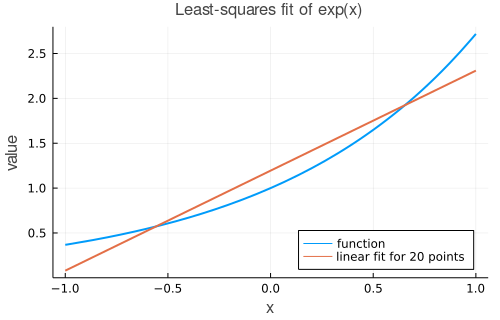

In [2]:
plot(exp,-1,1,label="function")

t = range(-1,1,length=20)
y = exp.(t)
V = [ ti^j for ti in t, j in 0:1 ]  # Vandermonde-ish
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="linear fit for 20 points",
    xaxis=("x"),yaxis=("value"),
    title="Least-squares fit of exp(x)",leg=:bottomright)

There's nothing special about 20 points. Choosing more doesn't change the result much.

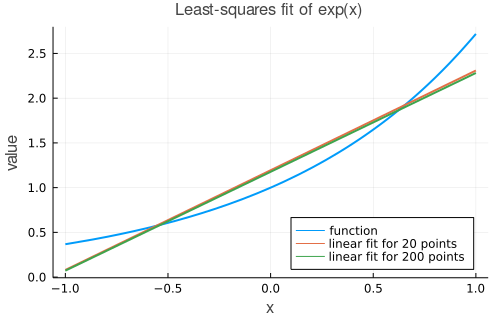

In [3]:
t = range(-1,1,length=200)
y = exp.(t)
V = [ ti^j for ti in t, j=0:1 ]
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="linear fit for 200 points",
    xaxis=("x"),yaxis=("value"),
    title="Least-squares fit of exp(x)",leg=:bottomright)

This situation is unlike interpolation, where the degree of the interpolant increases with the number of nodes. Here, the linear fit is apparently approaching a limit that we may think of as a continuous least-squares fit.

In [4]:
n = 40:60:400
slope = zeros(size(n))
intercept = zeros(size(n))

for (k,n) in enumerate(n)
    t = range(-1,1,length=n)
    y = exp.(t)
    V = [ ti^j for ti in t, j=0:1 ]
    c = V\y
    intercept[k],slope[k] = c
end

label = ["n","intercept","slope"]
pretty_table([n intercept slope],label)

┌───────┬───────────┬─────────┐
│     n │ intercept │   slope │
├───────┼───────────┼─────────┤
│  40.0 │   1.18465 │ 1.10906 │
│ 100.0 │   1.17892 │ 1.10579 │
│ 160.0 │   1.17752 │ 1.10498 │
│ 220.0 │   1.17688 │ 1.10462 │
│ 280.0 │   1.17652 │ 1.10441 │
│ 340.0 │   1.17629 │ 1.10427 │
│ 400.0 │   1.17612 │ 1.10418 │
└───────┴───────────┴─────────┘


```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

We can extend least-squares fitting from data to functions by extending several familiar finite-dimensional definitions. The continuous extension of a sum is an integral, which leads to the following.

```{index} ! inner product; of functions, ! inner product space, ! orthogonal functions
```

::::{proof:definition} Inner product of functions
Let $S$ be the set of continuous real-valued functions on the interval $[-1,1]$. The **inner product** of any functions $f$ and $g$ in $S$ is the real scalar

:::{math}
:label: leginner
\langle f,g \rangle  = \int_{-1}^1 f(x)g(x)\,dx.
:::

With this inner product, $S$ is an **inner product space**. The 2-norm of a function $f\in S$ is

:::{math}
:label: fun2norm
\|f\|_2 = \sqrt{\rule[1mm]{0pt}{0.75em}\langle f,f \rangle}.
:::

Functions $f$ and $g$ in $S$ are **orthogonal** if

$$
\langle f,g \rangle = 0.
$$
::::

## Quasimatrices

If we are extending our notion of vectors to include continuous functions, what should serve as an extension of a matrix? One of our most important interpretations of a matrix is the connection to linear combinations. For instance, the Vandermonde-like system $\mathbf{V} \mathbf{c} \approx \mathbf{y}$ from {eq}`vandersystemrect` is the statement

$$
\mathbf{y} \approx \mathbf{V} \mathbf{c} = c_0 \mathbf{v}_0 + c_1 \mathbf{v}_1 + \cdots + c_n \mathbf{v}_n,
$$

in which the $i$th row of $\mathbf{v}_j$ is $t_i^j$. This was derived as a discrete approximation for $j=0,\ldots,n$. 

:::{math}
\mathbf{y} \approx c_0 + c_1 x + \cdots + c_n x^n,
:::

which we want to abbreviate in "matrix"-vector form.

```{index} ! quasimatrix, ! Gram matrix
```

::::{proof:definition} Quasimatrix and Gram matrix
Given functions $f_1,\ldots,f_n$ in inner product space $S$, define the **quasimatrix**

:::{math}
:label: quasimat
\mathbf{F} =
\begin{bmatrix}
    \underline{f_1(x)} & \underline{f_2(x)} & \cdots &  \underline{f_n(x)}
\end{bmatrix}.
:::

For a vector $\mathbf{z} \in \real^n$, define the quasimatrix-vector product

:::{math}
:label: quasimatvec
\mathbf{F}\mathbf{z} = z_1f_1(x) + z_2f_2(x) + \cdots + z_n f_n(x).
:::

For another function $g\in S$, define the adjoint product

:::{math}
  :label: quasimatfun
  \mathbf{F}^T g =
  \begin{bmatrix}
    \langle f_1,g \rangle \\ \vdots  \\  \langle f_n,g \rangle
  \end{bmatrix}.
:::

Finally, define the **Gram matrix**

:::{math}
  :label: Gram
  \mathbf{F}^T \mathbf{F} = \bigl[ \langle f_i,f_j \rangle \bigr]_{\,i,j=1,\ldots,n}.
:::
::::

We consider any other expressions involving a quasimatrix to be undefined. It might help to think of $\mathbf{F}$ as an $\infty\times n$ matrix, which is consistent with the definitions that $\mathbf{F}\mathbf{z}$ is a function ($\infty\times 1$), $\mathbf{F}^T g$ is a vector ($n\times 1$), and $\mathbf{F}^T\mathbf{F}$ is a matrix ($n \times n$). When infinite dimensions combine in a product, we use integrals rather than sums.

::::{proof:example}
Let $\mathbf{F} = \bigl[ \,\underline{\cos(\pi x)} \quad \underline{\sin(\pi x)}\, \bigr]$. Then

$$
\mathbf{F} \begin{bmatrix} -2 \\ 1 \end{bmatrix} &= -2\cos(x) + \sin(x), \\
\mathbf{F}^T x & = \begin{bmatrix} \int_{-1}^1 x\cos(\pi x)\, dx \\  \int_{-1}^1 x\sin(\pi x)\, dx\end{bmatrix} = \begin{bmatrix} 0 \\ 2/\pi \end{bmatrix}, \\
\mathbf{F}^T\mathbf{F} &= \begin{bmatrix} \int_{-1}^1 \cos^2(\pi x)\, dx & \int_{-1}^1 \cos(\pi x)\sin(\pi x)\, dx \\ 
\int_{-1}^1 \cos(\pi x)\sin(\pi x)\, dx & \int_{-1}^1 \sin^2(\pi x)\, dx \end{bmatrix} = \mathbf{I}.
$$
::::


## Normal equations

The discrete linear least-squares problem of minimizing  $\| \mathbf{y} - \mathbf{V} \mathbf{c} \|_2$ over all possible $\mathbf{c}$, given matrix $\mathbf{V}$ and data vector $\mathbf{y}$, has a solution via the normal equations {eq}`normaleqns`,

:::{math}
:label: normalLS
\mathbf{c} = \left(\mathbf{V}^T\mathbf{V}\right)^{-1} \mathbf{V}^T \mathbf{y}.
:::

We can now reinterpret {eq}`normalLS` in terms of quasimatrices. 

(theorem-orthogonal-normal)=
::::{proof:theorem}
Given functions $f_1,\ldots,f_n$ and $y$ in an inner product space $S$, the least-squares problem

:::{math}
\operatorname{argmin}_{\mathbf{c}\in \real^n} \| c_1f_1(x) + \cdots + c_n f_n(x) - y(x) \|_2
:::

has the solution

:::{math}
:label: contLSsol
\mathbf{c} = \left(\mathbf{F}^T\mathbf{F}\right)^{-1} \mathbf{F}^T y,
:::

where $\mathbf{F}$ is the quasimatrix {eq}`quasimat`.
::::

There is no need to supply a proof of {numref}`Theorem {number} <theorem-orthogonal-normal>` because it will read exactly the same as for the discrete normal equations. All the effort has gone into making definitions that set up a perfect analogy. In retrospect, all we needed in the original discrete case were linear combinations and inner products.

(example-lsfitexpfun)=
::::{proof:example}
We revisit approximation of $e^x$ as suggested in {numref}`Demo %s <demo-orthogonal-approx>`. With the Vandermonde quasimatrix $\mathbf{V}= \begin{bmatrix} \underline{1} & \underline{x} \end{bmatrix}$, we get
  
$$
  \mathbf{V}^Te^x =
  \begin{bmatrix}
    \langle 1,e^x \rangle \\[1mm] \langle x,e^x \rangle
  \end{bmatrix} =
  \begin{bmatrix}
    \int_{-1}^1 e^x\, dx \\[1mm] \int_{-1}^1 x e^x\, dx
  \end{bmatrix} =
  \begin{bmatrix}
    e-e^{-1} \\ 2 e^{-1}
  \end{bmatrix}
$$

and

$$
  \mathbf{V}^T \mathbf{V} =
  \begin{bmatrix}
    \langle 1,1 \rangle & \langle 1,x \rangle \\[1mm] \langle x,1 \rangle & \langle x,x \rangle
  \end{bmatrix} =
  \begin{bmatrix}
    2 & 0 \\ 0 & 2/3
  \end{bmatrix}.
$$

The normal equations {eq}`contLSsol` therefore have solution

$$
  \mathbf{c} = \begin{bmatrix}
    2 & 0 \\ 0 & 2/3
  \end{bmatrix}^{-1}
  \begin{bmatrix}
    e-e^{-1} \\ 2 e^{-1}
  \end{bmatrix}
  =
  \begin{bmatrix}
    \sinh(1) \\ 3e^{-1}
  \end{bmatrix} \approx
  \begin{bmatrix}
    1.175201\\ 1.103638
  \end{bmatrix},
$$

which is well in line with the values found in {numref}`Demo %s <demo-orthogonal-approx>`. 

If we extend $\mathbf{V}$ by an additional column for $x^2$, then we need to calculate $\int_{-1}^1 x^2 e^x \, dx = e - 5e^{-1}$ and $\int_{-1}^1 x^4\, dx = 2/5$ to get

$$
  \mathbf{c} = \begin{bmatrix}
    2 & 0 & 2/3\\ 0 & 2/3 & 0 \\ 2/3 & 0 & 2/5
  \end{bmatrix}^{-1}    
  \begin{bmatrix}
    e-e^{-1} \\ 2 e^{-1} \\ e - 5e^{-1}
  \end{bmatrix}
  \approx
  \begin{bmatrix}
    0.9962940 \\ 1.103638 \\ 0.5367215
  \end{bmatrix}.
$$
::::

## Legendre polynomials

```{index} ! orthogonal polynomials
```

Equation {eq}`contLSsol` becomes much simpler if $\mathbf{V}^T\mathbf{V}$ is diagonal. By our definitions, this would imply that the columns of $\mathbf{V}$ are mutually orthogonal in the sense of the function inner product. This is not the case for the monomial functions $x^j$. But there are **orthogonal polynomials** which do satisfy this property.

For what follows, let $\mathcal{P}_n \subset S$ be the set of polynomials of degree $n$ or less.

```{index} ! Legendre polynomials
```

(definition-orthogonal-legendre)=
::::{proof:definition} Legendre polynomials
The **Legendre polynomials** are 

:::{math}
 :label: legendre
 \begin{split}
     P_0(x) &= 1, \\
     P_1(x) &= x, \\
     P_{k}(x) &= \frac{2k-1}{k}xP_{k-1}(x) - \frac{k-1}{k}P_{k-2}(x), \qquad k = 2,3,\ldots.
 \end{split}
:::
::::

Here are some key facts that are straightforward to prove.

(theorem-orthogonal-legendre)=
::::{proof:theorem} Properties of Legendre polynomials
1. The degree of $P_k$ is $k$.
2. $P_0,\ldots,P_n$ form a basis for $\mathcal{P}_n$. 
3. The Legendre polynomials are mutually orthogonal. More specifically, the Gram matrix is given by

:::{math}
 :label: legendreortho
 \langle P_i,P_j \rangle =
 \begin{cases}
   0, & i \neq j, \\
   \alpha_i^2 = \bigl(i+\tfrac{1}{2}\bigr)^{-1}, & i=j.
 \end{cases}
:::
::::

Now let us define the quasimatrix

:::{math}
  :label: legquasi
  \mathbf{L}_n(x) =
  \begin{bmatrix}
    \alpha_0^{-1} \underline{P_0} & \alpha_1^{-1} \underline{P_1} & \cdots
    & \alpha_{n}^{-1} \underline{P_{n}}
  \end{bmatrix}.
:::

Then $\mathbf{L}_n^T\mathbf{L}_n=\mathbf{I}$. The normal equations {eq}`contLSsol` thus simplify accordingly. Unraveling the definitions, we find the least-squares solution

:::{math}
  :label: funlssoln
  \mathbf{L}_n \bigl( \mathbf{L}_n^T f \bigr) = \sum_{k=0}^n c_k P_k(x), \quad \text{where }
  c_k = \frac{1}{\alpha_k^2} \langle P_k,f \rangle.
:::

## Chebyshev polynomials

Equation {eq}`leginner` is not the only useful way to define an inner product on a function space. It can be generalized to

:::{math}
  :label: weightedinner
  \langle f,g \rangle = \int_{-1}^1 f(x)g(x)w(x)\,dx
:::

for a positive function $w(x)$ called the **weight function** of the inner product. An important special case is

:::{math}
  :label: chebinner
  \langle f,g \rangle  = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1-x^2}}\,dx.
:::

```{index} ! Chebyshev polynomials
```

::::{proof:definition} Chebyshev polynomials
The **Chebyshev polynomials** are defined by

:::{math}
 :label: chebyshev
 \begin{split}
     T_0(x) &= 1, \\
     T_1(x) &= x, \\
     T_{k}(x) &= 2xT_{k-1}(x) - T_{k-2}(x) ,\qquad k = 2,3,\ldots.
 \end{split}
:::
::::

Chebyshev polynomials also have a startling alternative form,

:::{math}
:label: chebaltform
T_k(x) = \cos\left( k \theta \right), \quad \theta = \arccos(x).
:::

The results from {numref}`Theorem {number} <theorem-orthogonal-legendre>` apply to Chebyshev polynomials as well, with orthogonality being in the sense of {eq}`chebinner`. Their Gram matrix is given by

$$
\langle T_i,T_j \rangle 
  = \begin{cases} 0, &  i\neq j, \\ 
      \gamma_0^2 = \pi, & i=j=0, \\ 
      \gamma_i^2=\pi/2, & i=j>0. 
    \end{cases} 
$$ 

The least-squares solution is not the same in the Legendre and Chebyshev cases: both find the nearest approximation to a given $f(x)$, but the norm used to measure distances is not the same.

## Roots of orthogonal polynomials

Interesting properties can be deduced entirely from the orthogonality conditions. The following result will be relevant in {numref}`section-globalapprox-integration`. The same result holds for orthogonal polynomial families with different weight functions, such as the Chebyshev polynomials.

(theorem-orthogonal-roots)=
::::{proof:theorem}
All $n$ roots of the Legendre polynomial $P_n(x)$ are simple and real, and they lie in the open interval $(-1,1)$.
::::

::::{proof:proof}
Let $x_1,\ldots,x_m$ be all of the distinct roots of $P_n(x)$ between $-1$ and $1$ at which $P_n(x)$ changes sign (in other words, all roots of odd multiplicity). Define
  
$$
  r(x) = \prod_{i=1}^m (x-x_i).
$$

By definition, $r(x)P_n(x)$ does not change sign over $(-1,1)$. Therefore

:::{math}
  :label: legrootint
  \int_{-1}^1 r(x)P_n(x) \, dx \neq 0.
:::

Because $r$ is a degree-$m$ polynomial, we can express it as a combination of $P_0,\ldots,P_m$. If $m<n$, the integral {eq}`legrootint` would be zero, by the orthogonality property of Legendre polynomials. So $m\ge n$. Since $P_n(x)$ has at most $n$ real roots, $m=n$. All of the roots must therefore be simple, and this completes the proof.
::::

The result of {numref}`Theorem {number} <theorem-orthogonal-roots>` holds for orthogonal families of polynomials for other weight functions. The Chebyshev case is unusual in that thanks to {eq}`chebaltform`, the roots of $T_n$ are known explicitly:

:::{math}
  :label: chebfirstpoints
  t_k = \cos\left(\frac{2k-1}{2n}\pi\right), \qquad k=1,\ldots,n.
:::

```{index} ! Chebyshev points; first kind
```

These are known as the **Chebyshev points of the first kind**. The chief difference between first-kind and second-kind points is that the latter type include the endpoints $\pm 1$. Both work well for polynomial interpolation and give spectral convergence.

## Least squares versus interpolation

Both interpolation and the solution of a linear least-squares problem produce a projection of a function into the space of polynomials $\mathcal{P}_n$. In the least-squares case, the close connection with inner products and orthogonality makes the 2-norm, perhaps with a weight function, a natural setting for analysis. Because a constant weight function is the simplest choice, Legendre polynomials are commonly used for least squares.

Interpolation has no easy connection to inner products or the 2-norm. With interpolants a different kind of approximation analysis is more fruitful, often involving the complex plane, in which the max-norm is the natural choice. For reasons beyond the scope of this text, Chebyshev polynomials are typically the most convenient to work with in this context.

## Exercises

1. ✍ Let $\mathbf{F}$ be the quasimatrix $\bigl[\, \underline{1} \quad\! \underline{\cos(\pi x)}\quad\! \underline{\sin(\pi x)}\,\bigr]$ for $x\in[-1,1]$. 
   
    **(a)** Find $\mathbf{F}^T e^x$. 
    
    **(b)** Find $\mathbf{F}^T \mathbf{F}$.

2. ✍ **(a)** Find the best linear approximation in the least-squares sense to the function $\sin(x)$ on $[-1,1]$. 

    **(b)** Using {numref}`Theorem {number} <theorem-orthogonal-normal>`, explain why the best fitting quadratic polynomial will be the linear function you found in part (a). (Note: You do not need to carry out the complete calculation.)

3. 
    **(a)** ✍ ⌨ Use {eq}`legendre` to write out $P_2(x)$ and $P_3(x)$. Plot $P_0,P_1,P_2,P_3$ on one graph for $-1\le x \le 1$. (You may find it interesting to compare to the graph in [Exercise 3.3.3](problem-qr-legendre).)
    
    **(b)** ✍ ⌨  Use {eq}`chebyshev` to write out $T_2(x)$ and $T_3(x)$. Plot $T_0,T_1,T_2,T_3$ on one graph for $-1\le x \le 1$.

4. ✍ Use {eq}`legendre` to show that $P_n(x)$ is an odd function if $n$ is odd and an even function if $n$ is even.

5. ⌨ Using {eq}`legendre`, write a function `legpoly(x,n)` that returns a matrix whose columns are the Legendre polynomials $P_0,P_1,\ldots,P_n$ evaluated at all the points in the vector $x$. Then use your function to plot $P_0,P_1,P_2,P_3$ on one graph. 

6. ⌨ (Continuation of previous problem.) Choose 1600 evenly spaced points in $[-1,1]$. For $n=1,2,\ldots,16$, use this vector of points and the function `legpoly` to construct a $1600\times (n+1)$ matrix that discretizes the quasimatrix
   
    $$
     \mathbf{A}_n = 
    \begin{bmatrix}
     \underline{P_0} &  \underline{P_1} & \cdots 
    &  \underline{P_{n}}
    \end{bmatrix}.
    $$

    Make a table of the matrix condition number $\kappa(\mathbf{A}_n)$ as a function of $n$. (These will not be much larger than 1, showing that the Legendre polynomials are a good basis set.) 

7. ⌨ Using {eq}`chebaltform`, write a function `chebpoly` that returns a matrix whose columns are the Chebyshev polynomials $T_0,T_1,\ldots,T_n$ evaluated at all the points in the vector $x$. Then use your function to plot $T_0,T_1,T_2,T_3$ on one graph. 

8. 
    **(a)** ✍ Use {eq}`chebaltform` to show that the first-kind points {eq}`chebfirstpoints` are roots of $T_n$. 
    
    **(b)** ✍ Use {eq}`chebaltform` to show that the second-kind points {eq}`chebextreme` are local extreme points of $T_n$.

9.  ✍ Show that the definition {eq}`chebaltform` satisfies the recursion relation in {eq}`chebyshev`.

10. ✍ Use {eq}`chebaltform` to show that $\langle T_0,T_0 \rangle=\pi$ and $\langle T_k,T_k \rangle=\pi/2$ for $k>0$ in the Chebyshev-weighted inner product. (Hint: Change to the variable $\theta$.)